In [103]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
lemm = WordNetLemmatizer()
import numpy as np
from collections import Counter
lines=100000

In [104]:
data = pd.read_pickle(r"C:\Users\PIYUSH\Desktop\obj.pkl")
data3 = pd.read_pickle(r"C:\Users\PIYUSH\Desktop\auto1.pkl")
data2 = pd.read_pickle(r"C:\Users\PIYUSH\Desktop\essay.pkl")

In [105]:
data.head()

,essay_id,essay_set,essay,avg_trait_and_domain,vocab_count,word_count,n_count,v_count,adj_count,adv_count,sent_len,freek,beaut,corr_spell
0,1,1,"Dear local newspaper, I think effects computer...",0.111111,0.270777,0.319468,0.227642,0.260000,0.24,0.150685,0.157895,0.231481,0.213235,0.926667
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",0.125000,0.340483,0.384359,0.317073,0.406667,0.21,0.205479,0.200000,0.333333,0.323529,0.910798
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",0.097222,0.241287,0.258735,0.230352,0.220000,0.21,0.082192,0.136842,0.314815,0.213235,0.968992
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",0.138889,0.447721,0.506656,0.555556,0.420000,0.46,0.191781,0.273684,0.370370,0.500000,0.875000
4,5,1,"Dear @LOCATION1, I know having computers has a...",0.111111,0.345845,0.428453,0.311653,0.333333,0.23,0.287671,0.305263,0.370370,0.360294,0.875576


In [106]:
data3.head()

,essay_id,essay_set,essay,avg_trait_and_domain
0,1,1,"Dear local newspaper, I think effects computer...",8.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",8.0


In [107]:
del data["essay_id"]

In [108]:
data3.head()

,essay_id,essay_set,essay,avg_trait_and_domain
0,1,1,"Dear local newspaper, I think effects computer...",8.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",8.0


In [109]:
label=data3["avg_trait_and_domain"]

In [110]:
del data["avg_trait_and_domain"]

In [111]:
del data["essay"]

In [112]:
data.head()

,essay_set,vocab_count,word_count,n_count,v_count,adj_count,adv_count,sent_len,freek,beaut,corr_spell
0,1,0.270777,0.319468,0.227642,0.260000,0.24,0.150685,0.157895,0.231481,0.213235,0.926667
1,1,0.340483,0.384359,0.317073,0.406667,0.21,0.205479,0.200000,0.333333,0.323529,0.910798
2,1,0.241287,0.258735,0.230352,0.220000,0.21,0.082192,0.136842,0.314815,0.213235,0.968992
3,1,0.447721,0.506656,0.555556,0.420000,0.46,0.191781,0.273684,0.370370,0.500000,0.875000
4,1,0.345845,0.428453,0.311653,0.333333,0.23,0.287671,0.305263,0.370370,0.360294,0.875576


In [113]:
from scipy.stats import spearmanr
corr, p_value = spearmanr(data["beaut"],label)

In [114]:
label.fillna(0,inplace=True)

In [115]:
data.fillna(0,inplace=True)

In [122]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=1, n_estimators=100)
regr.fit(data, label) 
regr.score(data,label)

0.8978919891807572

In [78]:
pred=regr.predict(data)

In [242]:
pred[10723]

6.289972469292637

In [239]:
(data3["avg_trait_and_domain"].iloc[10700:12200])

10700     5.000000
10701     6.666667
10702     7.083333
10703     6.666667
10704     8.750000
10705     5.833333
10706     7.500000
10707    10.000000
10708     7.083333
10709     6.666667
10710     6.666667
10711     3.750000
10712     2.500000
10713     4.166667
10714     7.083333
10715     6.666667
10716     6.250000
10717     4.583333
10718     7.916667
10719    10.000000
10720     7.500000
10721     6.666667
10722     8.333333
10723     5.000000
10724     7.916667
10725     4.166667
10726     2.916667
10727     6.666667
10728     5.000000
10729     5.000000
           ...    
12170     9.583333
12171     7.916667
12172     8.333333
12173     8.333333
12174     7.500000
12175     7.083333
12176     6.666667
12177    10.000000
12178     5.833333
12179     5.000000
12180    10.000000
12181     7.916667
12182     7.083333
12183     7.500000
12184     7.916667
12185     5.000000
12186     5.416667
12187     3.333333
12188     2.916667
12189     2.500000
12190     5.833333
12191     5.

In [126]:
cor

0.9348724912053685

In [89]:
data3

,essay_id,essay_set,essay,avg_trait_and_domain
0,1,1,"Dear local newspaper, I think effects computer...",8.000000
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.000000
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.000000
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.000000
4,5,1,"Dear @LOCATION1, I know having computers has a...",8.000000
5,6,1,"Dear @LOCATION1, I think that computers have a...",8.000000
6,7,1,Did you know that more and more people these d...,10.000000
7,8,1,@PERCENT1 of people agree that computers make ...,10.000000
8,9,1,"Dear reader, @ORGANIZATION1 has had a dramatic...",9.000000
9,10,1,In the @LOCATION1 we have the technology of a ...,9.000000


In [79]:
data["avg_trait_and_domain"]=label

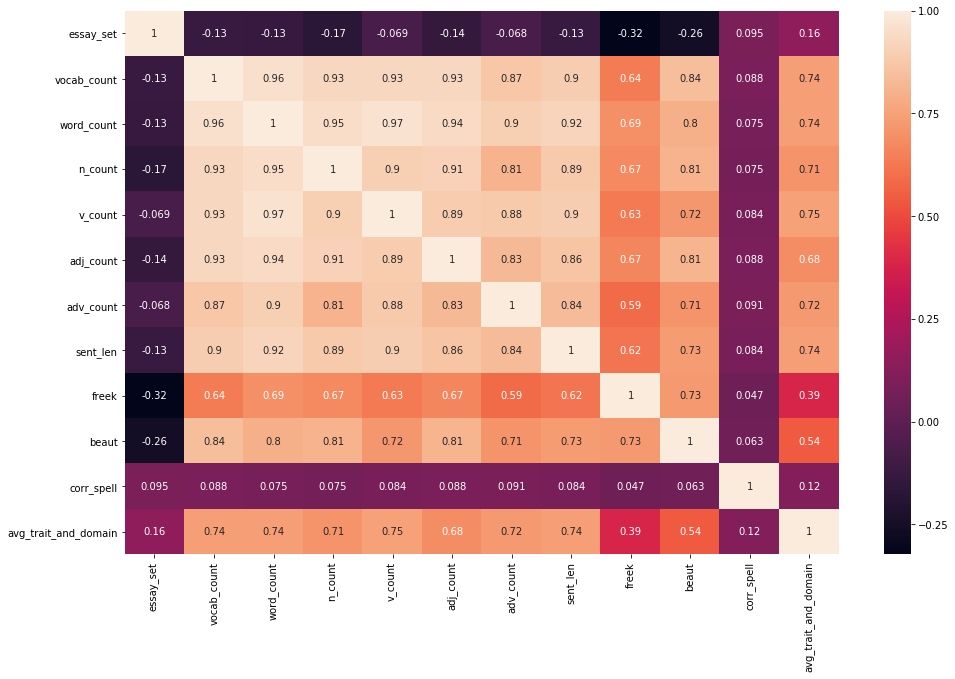

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

c:\users\piyush\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


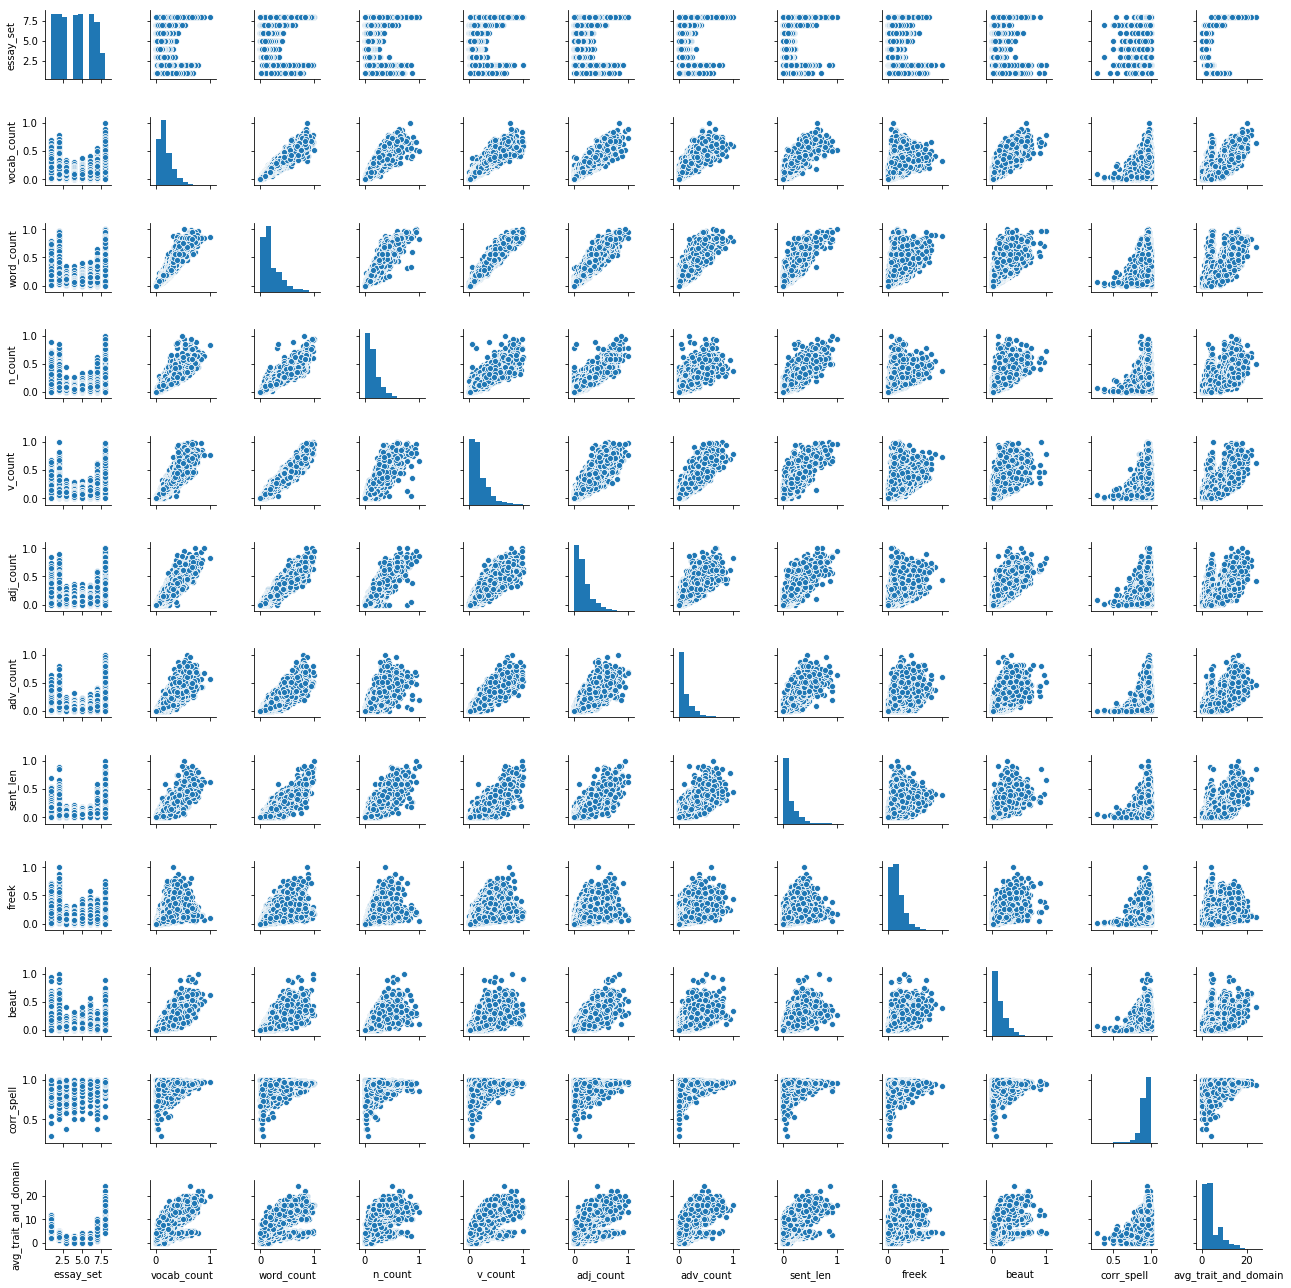

In [43]:
sns.pairplot(data, size=1.5);
plt.show()

In [80]:
from sklearn.metrics import mean_squared_error

In [81]:
mean_squared_error(label,pred)

1.3544941902579182

In [150]:
data["n_count"]=np.log(data["n_count"])

c:\users\piyush\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [151]:
data.isnull().sum()

essay_set               0
vocab_count             0
word_count              0
n_count                 0
v_count                 0
adj_count               0
adv_count               0
sent_len                0
freek                   0
beaut                   0
avg_trait_and_domain    0
dtype: int64

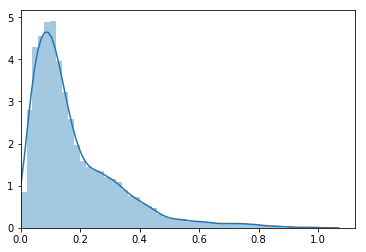

In [155]:
ls=["v_count"]
sns.distplot(data[ls]).set(xlim=(0))
plt.show()